[[0 0 1 1 0 0]
 [0 1 0 0 1 0]
 [1 1 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 0 0 0 1]]
[[0 1 1 1 1 0]
 [0 1 0 0 1 0]
 [0 1 1 1 1 0]
 [0 1 0 0 1 0]
 [0 1 1 1 1 0]]
[[0 1 1 1 1 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 1 1 1 0]]


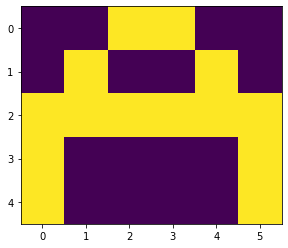

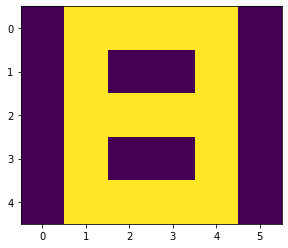

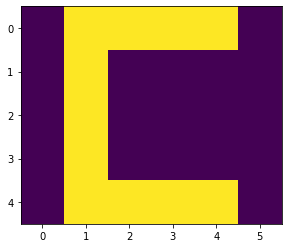

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]

#B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]

#C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]

# Creating labels 
y_train =[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

x = np.array(a)
y = np.array(b)
z = np.array(c)

rx = x.reshape(5,6)
ry = y.reshape(5,6)
rz = z.reshape(5,6)

print(rx,ry,rz, sep="\n")

plt.imshow(rx)
plt.show()
plt.imshow(ry)
plt.show()
plt.imshow(rz)
plt.show()



In [35]:
def sigmoid(x):
  return(1/(1+np.exp(-x)))


# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

#feed forward function
def feed_forward(x, w1, w2):
  
  #for hidden layer
  z1 = np.dot(x,w1) #x is input from input layer
  a1 = sigmoid(z1) # a1 is output of hidden layer

  #for output layer
  z2 = np.dot(a1,w2) #a1 is output of hidden layer
  a2 = sigmoid(z2) #a2 is output of output layer 
  return (a2)


#initializing weights randomly
def generate_weights(x,y):
  l = []
  for i in range(x*y):
    l.append(np.random.randn())
  return(np.array(l).reshape(x,y))


# for loss we will be using mean square error(MSE)
def loss(actual_output, target_output):
  s = np.square(target_output - actual_output)
  s = np.sum(s)/len(actual_output)
  return (s)



# back propagation function
# x is a single letter vector
# y is output for a single letter
def back_prop(x,y, w1, w2, alpha):

  #hidde layer
  z1 = np.dot(x,w1)
  a1 = sigmoid(z1)

  #output layer
  z2 = np.dot(a1, w2)
  a2 = sigmoid(z2)

  # error at output
  d2 = (a2 - y)
  d1 = np.multiply(np.dot(w2,d2.transpose()).transpose(), np.multiply(a1, 1-a1))

  #gradiant for w1 and w2
  w1_adj = np.dot(x.transpose(), d1)
  w2_adj = np.dot(a1.transpose(), d2)

  #updating weights
  w1 = w1 - (alpha * w1_adj)
  w2 = w2 - (alpha * w2_adj)
  return (w1, w2)




def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
  acc = []
  losss = []
  for j in range(epoch):
    l = []
    for i in range(len(x)):
      # print(l[0])
      out = feed_forward(x[i], w1, w2)
      l.append(loss(out, Y[i]))
      w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
    
    print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
    acc.append((1-(sum(l)/len(x)))*100)
    losss.append(sum(l)/len(x))
  return (acc, losss, w1, w2)




def predict(x, w1, w2):
  out = feed_forward(x, w1, w2)
  maxm = 0
  k = 0
  for i in range(len(out[0])):
    if(maxm < out[0][i]):
      maxm = out[0][i]
      k = i
  # print("output :", out)

  if(k == 0):
    print("Image is A")
  elif (k == 1):
    print("Image is B")
  else:
    print("Image is C")

  plt.imshow(x.reshape(5,6))
  plt.show()






In [39]:
# creating data and fitting

x_train = [x.reshape(1,30), y.reshape(1,30), z.reshape(1,30)]
y_train = np.array(y_train)

print(x_train)
print(y_train)


w1 = generate_weights(30, 5)
w2 = generate_weights(5,3)

print(w1)
print(w2)




[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[-2.18100989e-02  7.05658136e-02  1.02679099e+00 -1.93316965e+00
  -1.16469071e+00]
 [ 2.96261429e-01 -8.94814638e-01  4.71384488e-01 -1.34656057e+00
  -8.20866216e-01]
 [-9.03800510e-01  2.19606324e+00  6.58101537e-02 -4.91059172e-02
   6.28578581e-01]
 [ 7.15924226e-02  1.92677050e-01 -5.38421614e-01  1.13839233e+00
   4.43771113e-01]
 [ 2.08056989e-01 -7.64775544e-01 -8.63290007e-01 -9.18936821e-01
   1.11147422e+00]
 [ 1.12366593e+00  4.15855940e-02  7.67939152e-02 -3.85428622e-01
   8.06987906e-01]
 [ 2.86020437e+00 -1.14737312e+00  3.25722242e-01 -1.76687394e+00
   7.93019890e-01]
 [ 5.09694531e-01  3.60280229e-01 -7.21267217e-01

In [40]:
acc, loww, w1, w2 = train(x_train, y_train, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 30.136980414722935
epochs: 2 ======== acc: 39.236651182308535
epochs: 3 ======== acc: 44.250569069880704
epochs: 4 ======== acc: 47.603418768184866
epochs: 5 ======== acc: 50.24292634146681
epochs: 6 ======== acc: 52.44552524146782
epochs: 7 ======== acc: 54.328307933752164
epochs: 8 ======== acc: 55.95959703003548
epochs: 9 ======== acc: 57.38878641832383
epochs: 10 ======== acc: 58.65654486363982
epochs: 11 ======== acc: 59.79779799104141
epochs: 12 ======== acc: 60.84190669976033
epochs: 13 ======== acc: 61.81241683346652
epochs: 14 ======== acc: 62.72730968360043
epochs: 15 ======== acc: 63.599760849885214
epochs: 16 ======== acc: 64.43911547839407
epochs: 17 ======== acc: 65.2518338562521
epochs: 18 ======== acc: 66.04228599988534
epochs: 19 ======== acc: 66.81336609639281
epochs: 20 ======== acc: 67.5669439151124
epochs: 21 ======== acc: 68.30418622742684
epochs: 22 ======== acc: 69.02578215220845
epochs: 23 ======== acc: 69.73210124267067
epochs: 24 =====

Image is B


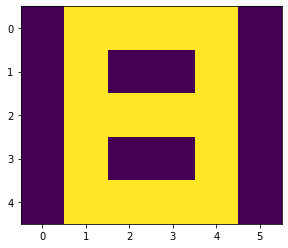

In [41]:
predict(x_train[1], w1, w2)
